Median proportion shortest paths  0.6725601724104131
Number of instances whose pairs contains a zero flow  0
The mean degrees 
[(np.float64(2.769230769230769), np.float64(1.0013439059954545)), (np.float64(2.78125), np.float64(1.0303025951146585)), (np.float64(2.857142857142857), np.float64(1.0860901604998978)), (np.float64(2.8917197452229297), np.float64(1.062263044146997)), (np.float64(2.9379310344827587), np.float64(0.9841550876884535)), (np.float64(2.9397590361445785), np.float64(1.0161277501313615)), (np.float64(2.948051948051948), np.float64(1.0179697632345674)), (np.float64(2.9559748427672954), np.float64(1.0835877511588312)), (np.float64(2.962025316455696), np.float64(1.107432176106299)), (np.float64(2.965034965034965), np.float64(1.04052560287865)), (np.float64(2.9759036144578315), np.float64(0.9691121711898895)), (np.float64(2.9759036144578315), np.float64(0.924576146648177)), (np.float64(2.979591836734694), np.float64(1.0846447598967397)), (np.float64(2.9864864864864864), np.

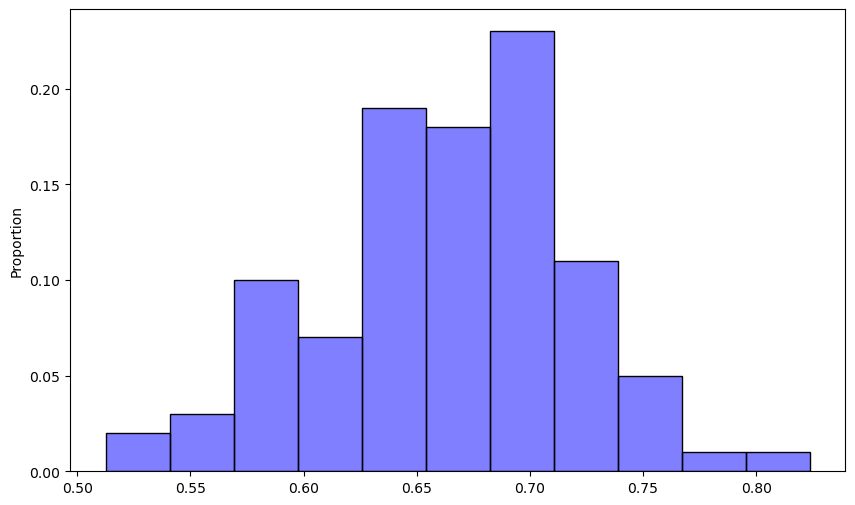

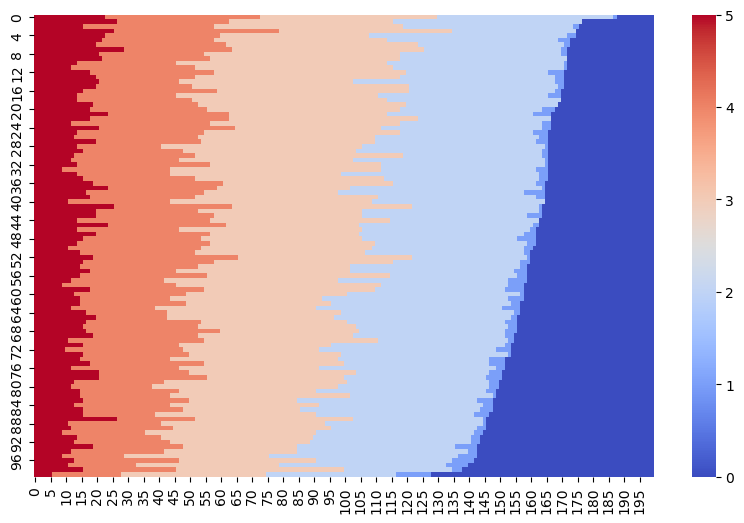

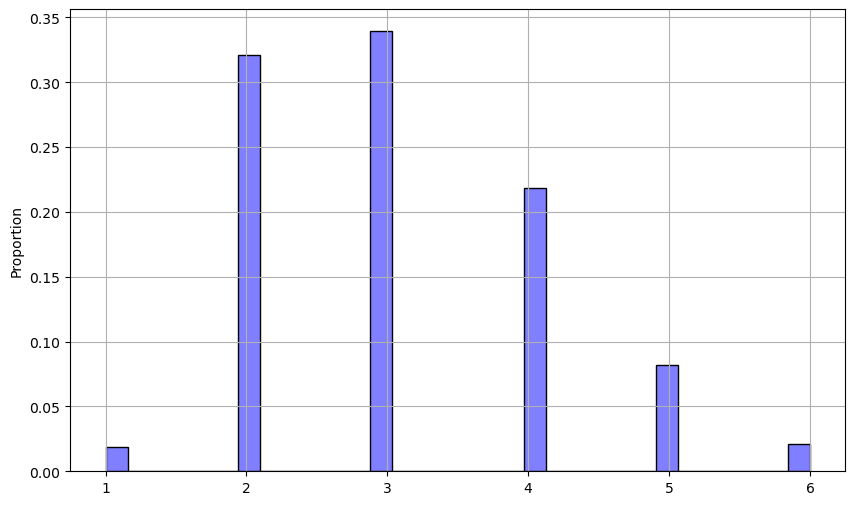

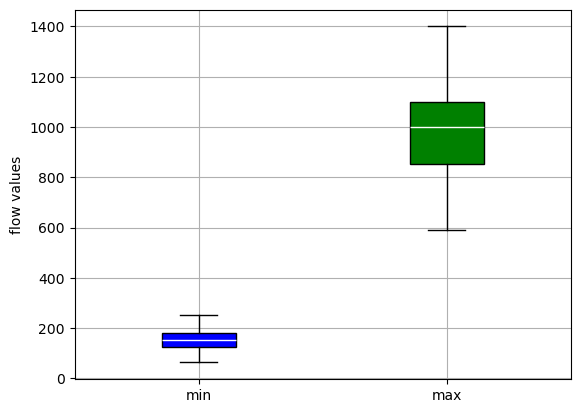

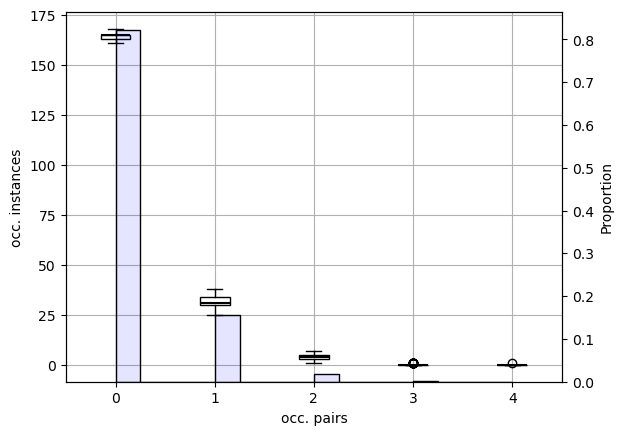

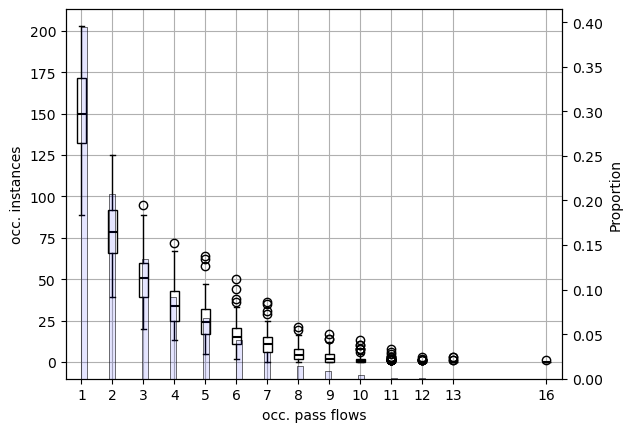

In [2]:
import os

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import pprint

import sys

os.chdir('C:\\Users\\HADDAM\\Documents\\Python Scripts\\multi_flow_decomp\\')
from utils.metrics import instance_flow_proportion_shortest_paths


nb_pairs = 20
dir_path_data = "data/simulated_data/complete_instances/node_pairs/data_instances_small_world_200_20.npy"
#dir_path_data = "data/simulated_data/complete_instances/node_pairs/data_instances_55_20.npy"
#dir_path_data = "data/simulated_data/complete_instances/node_pairs/data_instances_small_world_150_neigh_dist_capacity_factor=15_basecapacity=50_time=4_200_20.npy"
dict_instances = np.load(dir_path_data, 
                         allow_pickle = True).flatten()[0]


save_path = None
#save_path = "results/simulated/MFDS_vs_RL/results_test/generated_instances/"

"""
dict_instances[(i, 
                update_transport_time, 
                update_transition_function)] = (mfd_instance, multi_flow)
"""
nb_instances = len(set(id_instance for id_instance, _, _ in dict_instances))
dict_inst_fl_prop_sp = []
for num_instance in range(nb_instances):
    mfd_instance, _ = dict_instances[(num_instance, True, True)]
    val = instance_flow_proportion_shortest_paths (mfd_instance.adj_mat,
                                                   mfd_instance.original_aggregated_flow, 
                                                   mfd_instance.ideal_transport_times, 
                                                   mfd_instance.pairs)
    dict_inst_fl_prop_sp.append(val)
print("Median proportion shortest paths ", np.median(dict_inst_fl_prop_sp))
bins = 'auto'
fig = plt.figure(figsize = (10, 6))
g = sns.histplot(dict_inst_fl_prop_sp,
                color = "blue", 
                edgecolor = 'black', 
                alpha = 0.5,
                stat = 'proportion',
                bins = bins)
############################ distribution_prop_fl_sp_ ############################
if save_path is not None:
    fig.savefig(os.path.join(save_path, 
                             "distribution_prop_fl_sp_"), 
                             bbox_inches='tight', 
                             pad_inches = 0)



# Number of instances whose pairs contains a zero flow
nb_inst_0fl = len([1 for mfd_instance, _ in dict_instances.values() 
                   if len([1 for fl in mfd_instance.original_flow_values if fl == 0]) > 0])
print("Number of instances whose pairs contains a zero flow ", nb_inst_0fl)


# In-degrees and outdegrees of the nodes of all the instances
degrees = [[sum(int(mfd_instance.adj_mat[i][j] or mfd_instance.adj_mat[j][i]) 
                    for j in range(len(mfd_instance.adj_mat[0])))
                        for i in range(len(mfd_instance.adj_mat))]
                            for mfd_instance, _ in dict_instances.values()]
degrees.sort(key = lambda x : len([1 for deg in x if deg == 0]))
for degree_ls in degrees: degree_ls.sort(reverse = True)
fig = plt.figure(figsize = (10, 6))
colormap = sns.color_palette(palette = "coolwarm", as_cmap = True)
sns.heatmap(degrees, 
            cmap = colormap, 
            vmin = 0, 
            vmax = 5)
############################ heatmap_degrees_ ############################
if save_path is not None:
    fig.savefig(os.path.join(save_path, 
                             "heatmap_degrees_"), 
                             bbox_inches='tight', 
                             pad_inches = 0)



# Mean degrees
mean_degrees = [(np.mean([deg for deg in ls_degree if deg != 0]),
                 np.std([deg for deg in ls_degree if deg != 0])) 
                                for ls_degree in degrees]
#mean_degrees = [np.mean(ls_degree) for ls_degree in degrees]
mean_degrees.sort(key = lambda x : x[0])
print("The mean degrees ")
print(mean_degrees)
print("Min-max degrees ", 
      (round(mean_degrees[0][0], 3), round(mean_degrees[0][1], 3)),
      (round(mean_degrees[-1][0], 3), round(mean_degrees[-1][1], 3)))
union_degrees = []
for ls_degree in degrees: union_degrees += [deg for deg in ls_degree if deg != 0]
bins = 'auto'
fig = plt.figure(figsize = (10, 6))
g = sns.histplot(union_degrees,
                 color = "blue", 
                 edgecolor = 'black', 
                 alpha = 0.5,
                 stat = 'proportion',
                 bins = bins)
plt.grid(visible = True)
############################ distribution_degrees_ ############################
if save_path is not None:
    fig.savefig(os.path.join(save_path, 
                             "distribution_degrees_"), 
                             bbox_inches='tight', 
                             pad_inches = 0)


# Constructing a boxplot showing how the minimal and maximal flow values are spread
ls_min_fl_val = [min(mfd_instance.original_flow_values) 
                 for mfd_instance, _ in dict_instances.values()]
print("Minimal flow values range ", min(ls_min_fl_val), max(ls_min_fl_val))
ls_max_fl_val = [max(mfd_instance.original_flow_values) 
                 for mfd_instance, _ in dict_instances.values()]
print("Maximal flow values range ", min(ls_max_fl_val), max(ls_max_fl_val))

fig = plt.figure()
box = plt.boxplot(ls_min_fl_val, 
                  patch_artist = True,
                  widths = 0.3,
                  positions = [0])
box['boxes'][0].set_facecolor("blue")
box['medians'][0].set_color("white")

box = plt.boxplot(ls_max_fl_val, 
                  patch_artist = True,
                  widths = 0.3,
                  positions = [1])
box['boxes'][0].set_facecolor("green")
box['medians'][0].set_color("white")
plt.xticks([0, 1], ['min', 'max'])
plt.ylabel("flow values")
plt.grid(visible = True)
############################ min_max degrees distributions ############################
if save_path is not None:
    fig.savefig(os.path.join(save_path, 
                             "min_max_distributions"), 
                             bbox_inches='tight', 
                             pad_inches = 0)



# Constructing a histogram showing how many nodes are point of interests 
# (sources or destinations)
nb_instances = len(set(id_instance for id_instance, _, _ in dict_instances))
cpt_node_nbpis = [[0 for _ in range(nb_pairs+1)] for _ in range(nb_instances)]
for id_instance, _, _ in dict_instances:
    mfd_instance, multi_flow = dict_instances[id_instance, True, True]
    nb_nodes = len(mfd_instance.original_adj_mat)
    for node in range(nb_nodes):
        nb_times_pis = len([1 for s, t in mfd_instance.pairs if node == s or node == t])
        cpt_node_nbpis[id_instance][nb_times_pis] += 1

bins = 'auto'
fig, ax1 = plt.subplots()
medians = []
for nb_times in range(nb_pairs+1):
    if any(cpt_node_nbpis[id_instance][nb_times] > 0 
           for id_instance in range(nb_instances)):
        data = [cpt_node_nbpis[id_instance][nb_times] for id_instance in range(nb_instances)]
        medians.append(np.median(data))
        box = ax1.boxplot([cpt_node_nbpis[id_instance][nb_times] 
                           for id_instance in range(nb_instances)], 
                          patch_artist = True,
                          widths = 0.3,
                          positions = [nb_times])
        box['boxes'][0].set_facecolor("white")
        box['medians'][0].set(color = "black",
                              linewidth = 1.5)
plt.xlabel("occ. pairs")
plt.ylabel("occ. instances")
plt.grid(visible = True)
# Histogram
#fig2 = plt.figure()
summed_cpt_node_nbpis = np.sum(cpt_node_nbpis, axis = 0)
for i in range(len(summed_cpt_node_nbpis)):
    data += [i]*summed_cpt_node_nbpis[i]
ax2 = ax1.twinx() 
cumulative = False
g = sns.histplot(data,   
            color = "blue", 
            edgecolor = 'black', 
            alpha = 0.1,
            stat = 'proportion',
            cumulative = cumulative,
            bins = bins,
            ax = ax2)
h, i = {}, 0
for rectangle in g.patches:
    height = rectangle.get_height()
    if height != 0: h[i] = round(height, 3)
    i += 1
print("Heights histogram nodes in pairs {num_bin:val,...} ")
print(h)
############################ Occurances of the nodes in the pairs #####################
if save_path is not None:
    fig.savefig(os.path.join(save_path, 
                             "occ_node_pairs"), 
                             bbox_inches='tight', 
                             pad_inches = 0)


# Constructing a histogram showing how many arc is traversed by how many flow
nb_instances = len(set(id_instance for id_instance, _, _ in dict_instances))
cpt_arc_pairs = [[0 for _ in range(nb_pairs+1)] for _ in range(nb_instances)]
for id_instance, _, _ in dict_instances:
    mfd_instance, multi_flow = dict_instances[id_instance, True, True]
    nb_nodes = len(mfd_instance.original_adj_mat)
    for u in range(nb_nodes):
        for v in range(nb_nodes):
            if mfd_instance.original_adj_mat[u][v] == 1:
                nb_pass_flows = sum(int(multi_flow[i][u][v] > 0) 
                                    for i in range(len(multi_flow)))
                cpt_arc_pairs[id_instance][nb_pass_flows] += 1

bins = 'auto'
fig, ax1 = plt.subplots()
for nb_times in range(nb_pairs+1):
    if any(cpt_arc_pairs[id_instance][nb_times] > 0 
           for id_instance in range(nb_instances)):
        box = plt.boxplot([cpt_arc_pairs[id_instance][nb_times] 
                           for id_instance in range(nb_instances)], 
                          patch_artist = True,
                          widths = 0.3,
                          positions = [nb_times])
        box['boxes'][0].set_facecolor("white")
        box['medians'][0].set(color = "black",
                              linewidth = 1.5)
plt.grid(visible = True)
plt.xlabel("occ. pass flows")
plt.ylabel("occ. instances")
# Histogram
#fig2 = plt.figure()
summed_cpt_arc_pairs, data = np.sum(cpt_arc_pairs, axis = 0), []
for i in range(len(summed_cpt_arc_pairs)):
    data += [i]*summed_cpt_arc_pairs[i]
ax2 = ax1.twinx()
cumulative = False  
g = sns.histplot(data,   
            color = "blue", 
            edgecolor = 'black', 
            alpha = 0.1,
            cumulative = cumulative,
            stat = 'proportion',
            bins = bins,
            ax = ax2)
h, i = {}, 0
for rectangle in g.patches:
    height = rectangle.get_height()
    if height != 0: h[i] = round(height, 3)
    i += 1
print("Heights histogram flow passing through arcs {num_bin:val,...} ")
print(h)
############################ Number of pasing flow by arcs ############################
if save_path is not None:
    fig.savefig(os.path.join(save_path, 
                             "occ_flow_arcs"), 
                             bbox_inches='tight', 
                             pad_inches = 0)

plt.show()

In [ ]:
import os

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import pprint

import sys

os.chdir('C:\\Users\\HADDAM\\Documents\\Python Scripts\\multi_flow_decomp\\')

from utils.metrics import instance_flow_proportion_shortest_paths


#path = "multi_flow_generation_wei/data/graph_matrice.pypgr"
path = "multi_flow_generation_wei/data/LF.pypgr"


with open(path, "r") as file:
    cpt = 0
    for line in file:
        cpt += 1
print("The number of line ", cpt)

The number of line  109


Number of instances whose pairs contains a zero flow  0
Number of arcs by instance 
[311, 305, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284]
The mean degrees 
[(np.float64(2.980392156862745), np.float64(1.0799454611943011)), (np.float64(2.980392156862745), np.float64(1.0799454611943011)), (np.float64(2.980392156862745), np.float64(1.0799454611943011)), (np.float64(2.980392156862745), np.float64(1.0799454611943011)), (np.float64(2.980392156862745), np.float64(1.0799454611943011)), (np.float64(2.980392156862745), np.float64(1.0799454611943011)), (np.fl

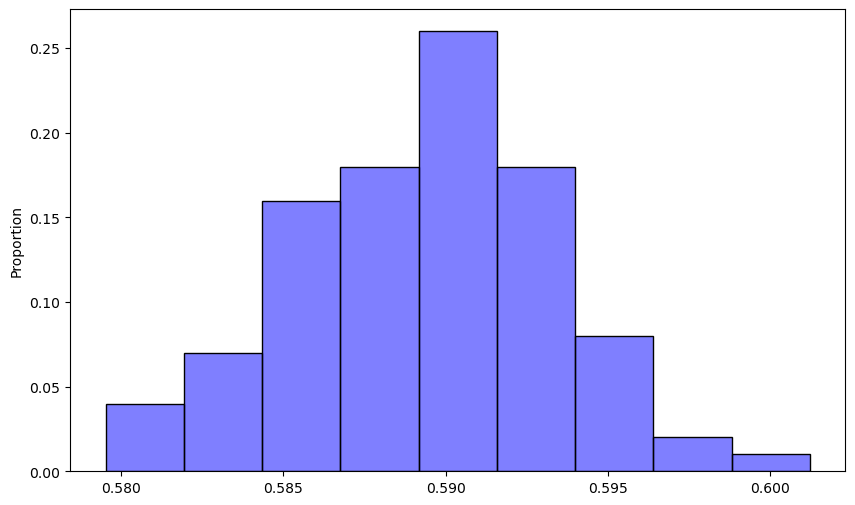

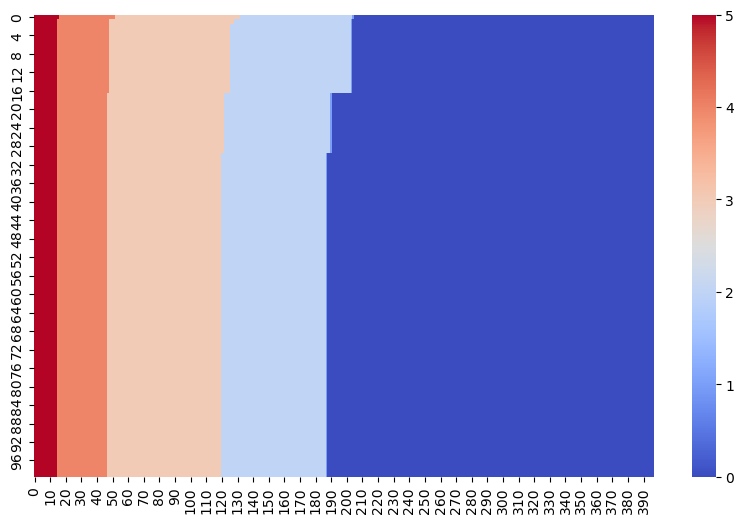

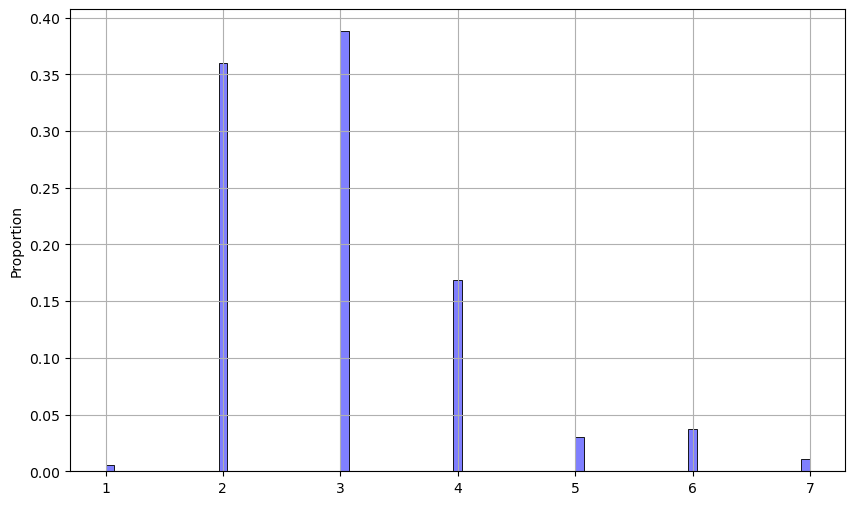

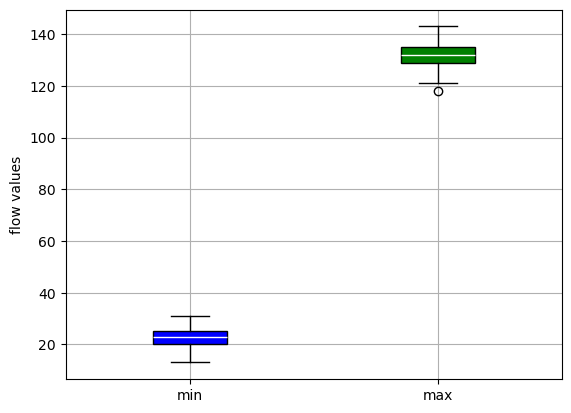

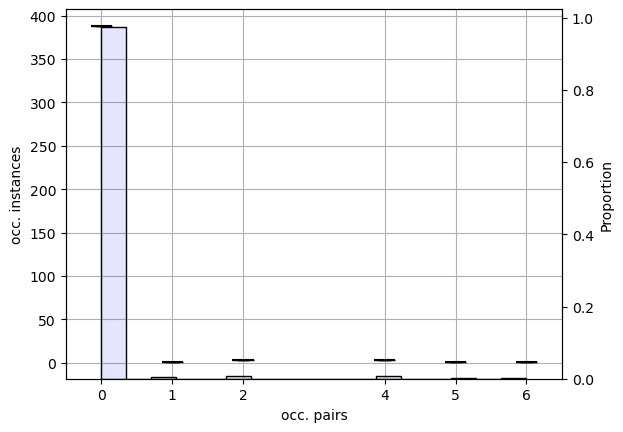

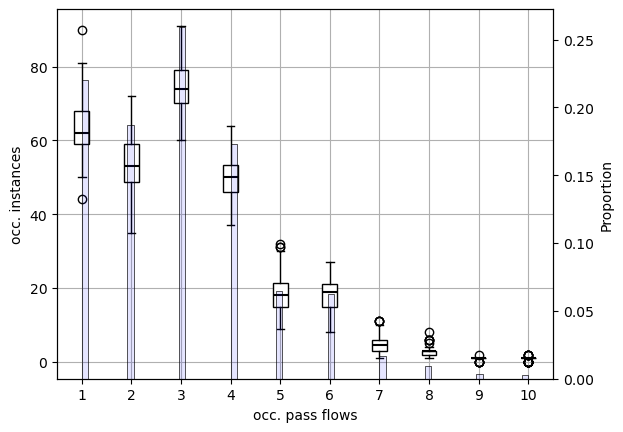

In [ ]:
import os

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import pprint

import sys

os.chdir('C:\\Users\\HADDAM\\Documents\\Python Scripts\\multi_flow_decomp\\')

from utils.general_eval_msmd_metrics import instance_flow_proportion_shortest_paths

from utils.graph_utils import in_degree, out_degree, get_nodes, get_arcs, has_arc

#dir_path_data = "multi_flow_generation_wei/data/data_instances.npy"
dir_path_data = "data/real_data/pre_processed/LieuSaint/data_instances.npy"
dict_instances = np.load(dir_path_data, 
                         allow_pickle = True).flatten()[0]

save_path = None
#save_path = "results/real/MFDS_vs_RL/generated_instances/"

"""
dict_instances[(i, 
                update_transport_time, 
                update_transition_function)] = (mfd_instance, multi_flow)
"""
nb_instances = len(set(id_instance for id_instance, _, _ in dict_instances))
dict_inst_fl_prop_sp, graph_representation = [], "adjacency_matrix"
for num_instance in range(nb_instances):
    mfd_instance, _ = dict_instances[(num_instance, True, True)]
    val = instance_flow_proportion_shortest_paths (mfd_instance.adj_mat,
                                                   mfd_instance.original_aggregated_flow, 
                                                   mfd_instance.ideal_transport_times, 
                                                   mfd_instance.pairs,
                                                   graph_representation = graph_representation)
    dict_inst_fl_prop_sp.append(val)
bins = 'auto'
fig = plt.figure(figsize = (10, 6))
g = sns.histplot(dict_inst_fl_prop_sp,
                color = "blue", 
                edgecolor = 'black', 
                alpha = 0.5,
                stat = 'proportion',
                bins = bins)
############################## distribution_prop_fl_sp_  ##############################
if save_path is not None:
    fig.savefig(os.path.join(save_path, 
                             "distribution_prop_fl_sp_"), 
                             bbox_inches='tight', 
                             pad_inches = 0)



# Number of instances whose pairs contains a zero flow
nb_inst_0fl = len([1 for mfd_instance, _ in dict_instances.values() 
                   if len([1 for fl in mfd_instance.original_flow_values if fl == 0]) > 0])
print("Number of instances whose pairs contains a zero flow ", nb_inst_0fl)


# In-degrees and outdegrees of the nodes of all the instances
nodes = get_nodes(mfd_instance.adj_mat)
nb_arcs = [len(get_arcs(mfd_instance.adj_mat)) 
                        for mfd_instance, _ in dict_instances.values()]
print("Number of arcs by instance ")
print(nb_arcs)
degrees = [[in_degree(mfd_instance.adj_mat, node)+\
            out_degree(mfd_instance.adj_mat, node)
            for node in nodes] for mfd_instance, _ in dict_instances.values()]
degrees.sort(key = lambda x : len([1 for deg in x if deg == 0]))
for degree_ls in degrees: degree_ls.sort(reverse = True)
fig = plt.figure(figsize = (10, 6))
colormap = sns.color_palette(palette = "coolwarm", as_cmap = True)
sns.heatmap(degrees, 
            cmap = colormap, 
            vmin = 0, 
            vmax = 5)
############################## heatmap_degrees_  ##############################
if save_path is not None:
    fig.savefig(os.path.join(save_path, 
                             "heatmap_degrees_"), 
                             bbox_inches='tight', 
                             pad_inches = 0)



# Mean degrees
mean_degrees = [(np.mean([deg for deg in ls_degree if deg != 0]),
                 np.std([deg for deg in ls_degree if deg != 0])) 
                                for ls_degree in degrees]
#mean_degrees = [np.mean(ls_degree) for ls_degree in degrees]
mean_degrees.sort(key = lambda x : x[0])
print("The mean degrees ")
print(mean_degrees)
print("Min-max degrees ", 
      (round(mean_degrees[0][0], 3), round(mean_degrees[0][1], 3)),
      (round(mean_degrees[-1][0], 3), round(mean_degrees[-1][1], 3)))
union_degrees = []
for ls_degree in degrees: union_degrees += [deg for deg in ls_degree if deg != 0]
bins = 'auto'
fig = plt.figure(figsize = (10, 6))
g = sns.histplot(union_degrees,
                 color = "blue", 
                 edgecolor = 'black', 
                 alpha = 0.5,
                 stat = 'proportion',
                 bins = bins)
plt.grid(visible = True)
############################## distribution_degrees_  ##############################
if save_path is not None:
    fig.savefig(os.path.join(save_path, 
                             "distribution_degrees_"), 
                             bbox_inches='tight', 
                             pad_inches = 0)




# Constructing a boxplot showing how the minimal and maximal flow values are spread
ls_min_fl_val = [min(mfd_instance.original_flow_values) 
                 for mfd_instance, _ in dict_instances.values()]
print("Minimal flow values range ", min(ls_min_fl_val), max(ls_min_fl_val))
ls_max_fl_val = [max(mfd_instance.original_flow_values) 
                 for mfd_instance, _ in dict_instances.values()]
print("Maximal flow values range ", min(ls_max_fl_val), max(ls_max_fl_val))

fig = plt.figure()
box = plt.boxplot(ls_min_fl_val, 
                  patch_artist = True,
                  widths = 0.3,
                  positions = [0])
box['boxes'][0].set_facecolor("blue")
box['medians'][0].set_color("white")

box = plt.boxplot(ls_max_fl_val, 
                  patch_artist = True,
                  widths = 0.3,
                  positions = [1])
box['boxes'][0].set_facecolor("green")
box['medians'][0].set_color("white")
plt.xticks([0, 1], ['min', 'max'])
plt.ylabel("flow values")
plt.grid(visible = True)
############################## min max flow val distribution  ############################
if save_path is not None:
    fig.savefig(os.path.join(save_path, 
                             "min_max_distributions"), 
                             bbox_inches='tight', 
                             pad_inches = 0)




# Constructing a histogram showing how many nodes are point of interests 
# (sources or destinations)
nb_pairs = 15
nb_instances = len(set(id_instance for id_instance, _, _ in dict_instances))
cpt_node_nbpis = [[0 for _ in range(nb_pairs+1)] for _ in range(nb_instances)]
for id_instance, _, _ in dict_instances:
    mfd_instance, multi_flow = dict_instances[id_instance, True, True]
    nb_nodes = len(mfd_instance.original_adj_mat)
    for node in range(nb_nodes):
        nb_times_pis = len([1 for s, t in mfd_instance.pairs if node == s or node == t])
        cpt_node_nbpis[id_instance][nb_times_pis] += 1

bins = 'auto'
fig, ax1 = plt.subplots()
medians = []
for nb_times in range(nb_pairs+1):
    if any(cpt_node_nbpis[id_instance][nb_times] > 0 
           for id_instance in range(nb_instances)):
        data = [cpt_node_nbpis[id_instance][nb_times] for id_instance in range(nb_instances)]
        medians.append(np.median(data))
        box = ax1.boxplot([cpt_node_nbpis[id_instance][nb_times] 
                           for id_instance in range(nb_instances)], 
                          patch_artist = True,
                          widths = 0.3,
                          positions = [nb_times])
        box['boxes'][0].set_facecolor("white")
        box['medians'][0].set(color = "black",
                              linewidth = 1.5)
plt.xlabel("occ. pairs")
plt.ylabel("occ. instances")
plt.grid(visible = True)
# Histogram
#fig2 = plt.figure()
summed_cpt_node_nbpis = np.sum(cpt_node_nbpis, axis = 0)
for i in range(len(summed_cpt_node_nbpis)):
    data += [i]*summed_cpt_node_nbpis[i]
ax2 = ax1.twinx() 
cumulative = False
g = sns.histplot(data,   
            color = "blue", 
            edgecolor = 'black', 
            alpha = 0.1,
            stat = 'proportion',
            cumulative = cumulative,
            bins = bins,
            ax = ax2)
h, i = {}, 0
for rectangle in g.patches:
    height = rectangle.get_height()
    if height != 0: h[i] = round(height, 3)
    i += 1
print("Heights histogram nodes in pairs {num_bin:val,...} ")
print(h)
############################## occurances of nodes in the pairs  ######################
if save_path is not None:
    fig.savefig(os.path.join(save_path, 
                             "occ_node_pairs"), 
                             bbox_inches='tight', 
                             pad_inches = 0)




# Constructing a histogram showing how many arc is traversed by how many flow
nb_pairs = 15
nb_instances = len(set(id_instance for id_instance, _, _ in dict_instances))
cpt_arc_pairs = [[0 for _ in range(nb_pairs+1)] for _ in range(nb_instances)]
for id_instance, _, _ in dict_instances:
    mfd_instance, multi_flow = dict_instances[id_instance, True, True]
    nb_nodes = len(mfd_instance.original_adj_mat)
    for u in range(nb_nodes):
        for v in range(nb_nodes):
            if has_arc(mfd_instance.original_adj_mat, u, v):
                nb_pass_flows = sum(int(multi_flow[i][u][v] > 0) 
                                    for i in range(len(multi_flow)))
                cpt_arc_pairs[id_instance][nb_pass_flows] += 1

bins = 'auto'
fig, ax1 = plt.subplots()
for nb_times in range(nb_pairs+1):
    if any(cpt_arc_pairs[id_instance][nb_times] > 0 
           for id_instance in range(nb_instances)):
        box = plt.boxplot([cpt_arc_pairs[id_instance][nb_times] 
                           for id_instance in range(nb_instances)], 
                          patch_artist = True,
                          widths = 0.3,
                          positions = [nb_times])
        box['boxes'][0].set_facecolor("white")
        box['medians'][0].set(color = "black",
                              linewidth = 1.5)
plt.grid(visible = True)
plt.xlabel("occ. pass flows")
plt.ylabel("occ. instances")
# Histogram
#fig2 = plt.figure()
summed_cpt_arc_pairs, data = np.sum(cpt_arc_pairs, axis = 0), []
for i in range(len(summed_cpt_arc_pairs)):
    data += [i]*summed_cpt_arc_pairs[i]
ax2 = ax1.twinx()
cumulative = False  
g = sns.histplot(data,   
            color = "blue", 
            edgecolor = 'black', 
            alpha = 0.1,
            cumulative = cumulative,
            stat = 'proportion',
            bins = bins,
            ax = ax2)
h, i = {}, 0
for rectangle in g.patches:
    height = rectangle.get_height()
    if height != 0: h[i] = round(height, 3)
    i += 1
print("Heights histogram flow passing through arcs {num_bin:val,...} ")
print(h)
############################## number of flows passing in the arcs  #################
if save_path is not None:
    fig.savefig(os.path.join(save_path, 
                             "occ_flow_arcs"), 
                             bbox_inches='tight', 
                             pad_inches = 0)

plt.show()

In [ ]:
import os

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import pprint

import sys

os.chdir('C:\\Users\\HADDAM\\Documents\\Python Scripts\\multi_flow_decomp\\')
from utils.metrics import instance_flow_proportion_shortest_paths


nb_pairs = 20
#dir_path_data = "data/simulated_data/complete_instances/node_pairs/data_instances_75_15.npy"
#dir_path_data = "data/simulated_data/complete_instances/node_pairs/data_instances_55_20.npy"
dir_path_data = "data/simulated_data/complete_instances/node_pairs/data_instances_small_world_150_neigh_dist_capacity_factor=15_basecapacity=50_time=4_200_20.npy"
dict_instances = np.load(dir_path_data, 
                         allow_pickle = True).flatten()[0]


save_path = None
#save_path = "results/simulated/MFDS_vs_RL/results_test/generated_instances/"





1.0
0.0
